# Week 10 Problem Set


In [1]:
%load_ext nb_mypy
%nb_mypy On

Version 1.0.5


In [2]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from IPython.display import display

## Cohort Session

**CS0.** *Plot:* Read data for Boston Housing Prices and write a function `get_features_targets()` to get the columns for the features and the targets from the input argument data frame. The function should take in Pandas' dataframe and two lists. The first list is for the feature names and the other list is for the target names. 

We will use the following columns for our test cases:
- x data: RM column - use z normalization (standardization)
- y data: MEDV column

**Make sure you return a new data frame for both the features and the targets.**

We will normalize the feature using z normalization. Plot the data using scatter plot. 



In [4]:
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    # check for optional values 
    if columns_means is None:
        # compute
        columns_means = array.mean(axis=0) 
    if columns_stds is None:
        # compute
        columns_stds = array.std(axis=0) 
    normalized_columns: np.ndarray = (array - columns_means) / columns_stds
    return normalized_columns, columns_means, columns_stds


In [5]:
def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature: pd.DataFrame = df[feature_names]
    df_target: pd.DataFrame = df[target_names] 
    pass
    return df_feature, df_target

In [6]:
df: pd.DataFrame = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df,["RM"],["MEDV"])
array_feature,_,_ = normalize_z(df_feature.to_numpy())

assert isinstance(array_feature, np.ndarray)
assert isinstance(df_target, pd.DataFrame)
assert np.isclose(array_feature.mean(), 0.0)
assert np.isclose(array_feature.std(), 1.0)
assert np.isclose(df_target.mean(), 22.532806)
assert np.isclose(df_target.std(), 9.1971)


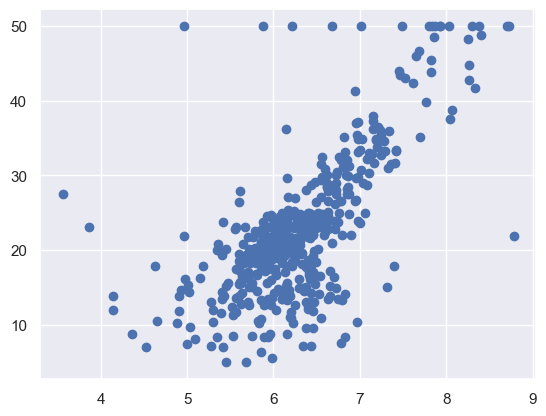

In [7]:
sns.set()
plt.scatter(df_feature, df_target)

**CS1.** *Cost Function:* Write a function `compute_cost_linreg()` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

Recall that:

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x^i) = \hat{\beta}_0 + \hat{\beta}_1 x^i$$

The function should receive a numpy array, so we will need to convert to numpy array and change the shape. To do this, we will create three other functions:
- `calc_linreg(X, b)`: which is used to calculate the $\hat{y} = Xb$ vector.
- `prepare_feature(df)`: which takes in a two-dimensional numpy array for the feature. The function should also add a column of constant 1s in the first column.

You can use the following methods in your code:
- `df.to_numpy()`: which is to convert a Pandas data frame to Numpy array.
- `np.reshape(row, col)`: which is to reshape the numpy array to a particular shape.
- `np.concatenate((array1, array2), axis)`: which is to join a sequence of arrays along an existing axis.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `np.squeeze()`: to reduce the numpy array to a single number.


In [8]:
# we need to call this m times to come up with m predictions from m training dataset 
# if we increase the dimension of the features, we need to change the code --> not ideal
def calc_single_value_linreg(b0, b1, x):
    return b0 + b1 * x 


def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    # X is a matrix, of dimension m x d 
    # m: number of training points
    # d: dimension of the feature + 1 
    # e.g: in simple linear regression we have b0 + b1x ---> d = 2
    #       in multiple linear regression we have b0 + b1x_1 + b2x_2 ---> d = 3
    # beta: is a vector of dimension d x 1 
    # return value: y, a vector of dimension m x 1 
    # y = Xb 
    return np.matmul(X, beta)

In [9]:
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    m: int = X.shape[0] # X is an m by d matrix, m = number of training data
    error = calc_linreg(X, beta) - y # error vector, m by 1 
    # transposing vector error and performing matrix multiplication with the original vector error give us the sum squared of the elements 
    # but in practice, it is OK to just loop through each element of error list, square them, and accumulate the sum 
    # sum = 0
    # for element in error: 
    #   sum = element*element 
    
    J = (1/(2*m)) * np.matmul(error.T, error)
    return np.squeeze(J)


In [10]:
def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
   # this function returns the X matrix 
   # given a feature vector / matrix, augment it with column of 1s as the first column
   # feature: [[x1], [x2], [x3]] 
   # X:[[1, x1], [1, x2], [1, x3]] 

   number_of_rows = np_feature.shape[0]
   
   # create a vector of ones, with rows as many as the np_feature rows 
   column_of_ones = np.ones((number_of_rows,1))
   
   X = np.concatenate((column_of_ones,np_feature), axis=1 )

   return X

In [11]:
X: np.ndarray = prepare_feature(df_feature.to_numpy())
target: np.ndarray = df_target.to_numpy()

assert isinstance(X, np.ndarray)
assert isinstance(target, np.ndarray)
assert X.shape == (506, 2)
assert target.shape == (506, 1)

In [12]:
# print(X)
beta: np.ndarray = np.zeros((2,1))
J: np.ndarray = compute_cost_linreg(X, target, beta)
print(J)
assert np.isclose(J, 296.0735)

beta: np.ndarray = np.ones((2,1))
J: np.ndarray = compute_cost_linreg(X, target, beta)
print(J)
assert np.isclose(J, 154.2249)

beta: np.ndarray = np.array([-1, 2]).reshape((2,1))
J: np.ndarray = compute_cost_linreg(X, target, beta)
print(J)
assert np.isclose(J, 94.3256)


296.0734584980238
154.22493384090902
94.3256152055336


**CS2.** *Gradient Descent:* Write a function called `gradient_descent_linreg()` that takes in these parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two numpy arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

You can use some of the following functions:
- `calc_linreg(X, b)`: which is used to calculate $y = Xb$ vector.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `compute_cost_linreg()`: which the function you created in the previous problem set to compute the cost.

In [13]:
def lin_reg_deriv(X, beta, y):
    return np.matmul(X.T, (calc_linreg(X,beta) - y)) # XT x ((X x b) - y)): (X x b) is calc_linreg(X,beta)

# X : feature matrix, m by d 
# y : target vector, m by 1
# beta: parameter vector: d by 1 
# alpha: scalar, learning rate of grad descent
# num_iters: how many times we should update the beta 
def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray, 
                            alpha: float, num_iters: int, input_deriv_func = None) -> tuple[np.ndarray, np.ndarray]:
    # create variables to store the errors with each iteration 
    J_storage = np.zeros((num_iters,1))
    m = X.shape[0] # get number of data in the trainset 

    if input_deriv_func is None:
        derivative_function = lin_reg_deriv 
    else:
        derivative_function = input_deriv_func
        
    for n in range(num_iters):
        # compute the derivative dJ/dB 
        
        derivative_value = derivative_function(X, beta, y)
        beta = beta - alpha * (1/m) * derivative_value 
        J_storage[n] = compute_cost_linreg(X, y, beta)
    
    
    return beta, J_storage

In [14]:
iterations: int = 1500
alpha: float = 0.001
beta: np.ndarray = np.zeros((2,1))

beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
print(beta)
assert np.isclose(beta[0], -0.069488, rtol=1e-3)
assert np.isclose(beta[1], 3.6626356, rtol=1e-3)

[[-0.06948865]
 [ 3.66263559]]


In [15]:
J_storage

array([[274.66968131],
       [254.98408748],
       [236.87874906],
       ...,
       [ 29.17607254],
       [ 29.17589517],
       [ 29.17571781]])

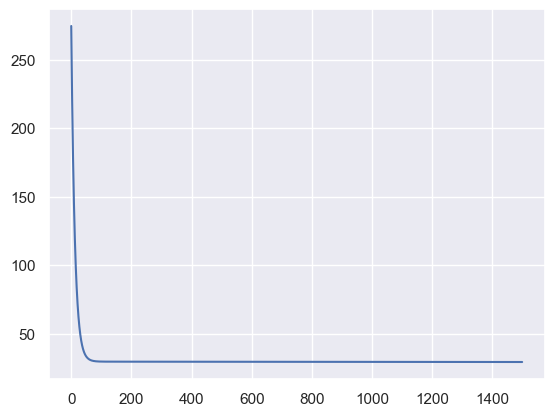

In [16]:
plt.plot(J_storage) 
# for a plot of errors at each step of gradient descent:
# if we reach a plateau after certain iterations, given that the iterations are large enough, that usually means that we have reached a global minimum

**CS3.** *Predict:* Write the function `predict_linreg()` that calculates the straight line equation given the features and its coefficient.
- `predict_linreg()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `calc_linreg()` to get the predicted y values.

You can use some of the following functions:
- `calc_linreg(X, beta)`: which is used to calculate the predicted y after X has been normalized and added by a constant.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `normalize_z(df)`: which is to do z normalization on the data frame.

In [17]:
# predict_linreg will eventually call calc_linreg, after preparing the features (normalizing, and augmenting)
def predict_linreg(array_feature: np.ndarray, beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    # normalize the feature using z normalisation 
    # normalized_output = normalize_z(array_feature, means, stds)
    # normalized_features = normalized_output[0]
    
    normalized_features, _, _ = normalize_z(array_feature, means, stds) 

    # create the X matrix from normalized_features 
    # this will add the columns of ones to the feature matrix 
    X = prepare_feature(normalized_features)

    return calc_linreg(X, beta)
    

In [18]:
df_feature, buf = get_features_targets(df, ["RM"], [])
beta: np.ndarray = np.array([[22.53279993],[ 6.39529594]]) # from previous result
pred: np.ndarray = predict_linreg(df_feature.to_numpy(), beta)

assert isinstance(pred, np.ndarray)
assert pred.shape == (506, 1)
assert np.isclose(pred.mean(), 22.5328, rtol=1e-3)
print(pred.std())
assert np.isclose(pred.std(), 6.3953, rtol=1e-3)

6.39529594


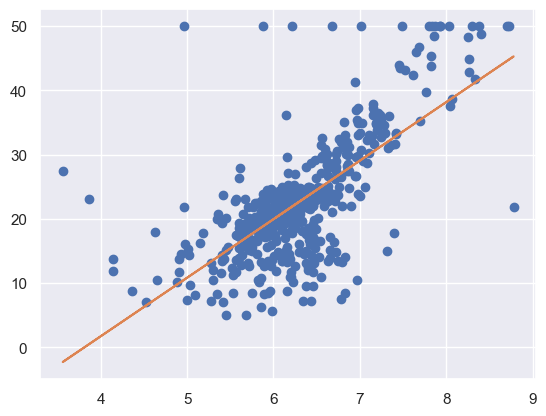

In [19]:
plt.plot(df_feature["RM"],target,'o')
plt.plot(df_feature["RM"],pred,'-')

In [20]:
means: np.ndarray = np.array([6.284634])
stds: np.ndarray = np.array([0.702617])
beta: np.ndarray = np.array([[22.53279993],[ 6.39529594]]) # from previous result
input_1row: np.ndarray = np.array([[6.593]])
pred_1row: np.ndarray = predict_linreg(input_1row, beta, means, stds)
assert np.isclose(pred_1row[0][0], 25.33958)

**CS4.** *Splitting data:* Do the following tasks:
- Read RM as the feature and MEDV as the target from the data frame.
- Use Week 9's function `split_data()` to split the data into train and test using `random_state=100` and `test_size=0.3`. 
- Normalize and prepare the features and the target.
- Use the training data set and call `gradient_descent_linreg()` to obtain the `theta`.
- Use the test data set to get the predicted values.

You need to replace the `None` in the code below with other a function call or any other Python expressions. 

In [21]:
def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:

    # get all the indexes (row index) of the complete dataset  
    indexes = df_feature.index  # e.g: 0, 1, 2, 3, ... 999

    # check whether random state is given 
    if random_state != None:
        np.random.seed(random_state) # if random_state is None, then we don't execute this line 

    # if random_state in None, then we will have a different set of train/test set each time we call this function
    # otherwise, it will be the same selection each time 

    # e.g: if test_size is 0.3, and len(indexes) is 1000, then test_set_size will be 300
    test_set_size = int(test_size * len(indexes)) # this will be the amount of dataset in the test set 

    # test_index will be a random 30% selection of indexes 
    # replace = False tells numpy that we won't have repeated indexes 
    test_index = np.random.choice(indexes, test_set_size, replace=False)

    train_index = indexes.drop(test_index) 
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index,:]
    df_target_train = df_target.loc[train_index]
    df_target_test = df_target.loc[test_index,:]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
    


In [22]:
# get features and targets from data frame
# df_feature, df_target = (None, None)

# split the data into training and test data sets
# df_feature_train, df_feature_test, df_target_train, df_target_test = (None, None, None, None)

# normalize the feature using z normalization
# array_feature_train_z, means, stds = None, None, None

# X: np.ndarray = None
# target: np.ndarray = None

# iterations: int = 1500
# alpha: float = 0.01
# beta: np.ndarray = np.zeros((2,1))

# call the gradient_descent function
# beta, J_storage = None, None

# call the predict method to get the predicted values
# pred: np.ndarray = None

### BEGIN SOLUTION
# get data as dataframe, and split them into train and test set 
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"])
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

# normalise features and get its output as numpy array 
array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())

# prepare feature matrix X and target vector as numpy arrays 
X = prepare_feature(array_feature_train_z)
target = df_target_train.to_numpy() 

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((2,1)) # just an initial guess

beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

# notice that we normalize the df_feature_test inside predict_linreg with the trainset's means and stds
pred: np.ndarray = predict_linreg(df_feature_test.to_numpy(), beta, means, stds)

### END SOLUTION
print(beta)

[[22.66816258]
 [ 6.26923893]]


In [23]:

assert isinstance(pred, np.ndarray)
assert pred.shape == (151, 1)
assert np.isclose(pred.mean(), 22.31259, rtol=1e-3)
assert np.isclose(pred.std(), 5.69332, rtol=1e-3)


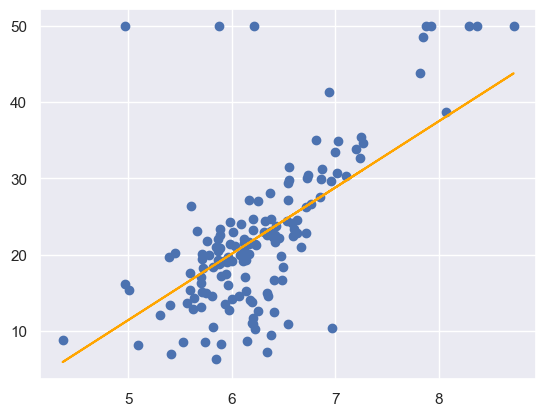

In [24]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

**CS5.** Create a function `build_model_linreg()` that perform the following steps:
- change all data to numpy array.
- normalize the training feature data set using `normalize_z()` function.
- create X matrix.
- run gradient descent by calling `gradient_descent_linreg()` function.

This function should output `model` and `J_storage` where `model` is a dictionary containing `beta`, `means` and `stds`. 

In [25]:
# we pack the steps to convert the feature & target train dataframe into numpy, performing z-normalization, coming up with the X matrix and target vectors and performing gradient descent into a function
# it is easier to make a function call with parameters: beta, alpha, iteration than to eyeball someone's script and finding out which line to change to suit your case 
# this function returns the 'model' dictionary: beta (trained), means, stds ---> all of which are useful for prediction
def build_model_linreg(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       beta: Optional[np.ndarray] = None,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], np.ndarray]:
    if beta is None:
        beta = np.zeros((df_feature_train.shape[1] + 1, 1)) 
    assert beta.shape == (df_feature_train.shape[1] + 1, 1)
    model: dict[str, Any] = {}
    ### BEGIN SOLUTION
    # normalise features and get its output as numpy array 
    array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())

    # prepare feature matrix X and target vector as numpy arrays 
    X = prepare_feature(array_feature_train_z)
    target = df_target_train.to_numpy() 

    beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

    model = {"beta": beta, "means": means, "stds": stds}
    return model, J_storage

In [26]:
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"])
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)
model, J_storage = build_model_linreg(df_feature_train, df_target_train)
model
assert isinstance(model, dict)
assert "beta" in model
assert "means" in model
assert "stds" in model
assert model['beta'].shape == (2, 1)
assert np.isclose(model['beta'][0, 0], 22.66816258)  
assert np.isclose(model['beta'][1, 0], 6.26923893) 
assert np.isclose(model['means'], 6.2968338)
assert np.isclose(model['stds'], 0.72077827)

**CS6.** *R2 Coefficient of Determination:* Write a function to calculate the coefficient of determination as given by the following equations.

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ 

where $y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$

where 
$$ \overline{y} = \frac{1}{n} \Sigma_{i=1}^n y_i$$
and $n$ is the number of target values.

You can use the following functions in your code:
- `np.mean(array)`: which is to get the mean of the array. You can also call it using `array.mean()`.
- `np.sum(array)`: which is to sum the array along a default axis. You can specify which axis to perform the summation.

In [27]:
# y is a vector, ypred is also a vector
# of same size 
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    # get the mean of the actual target
    ymean = np.mean(y)
    pred_target_difference_with_mean = y - ymean
    # sum-squared is just a matrix multiplication of that vector (transposed) with itself
    sstot = np.matmul(pred_target_difference_with_mean.T, pred_target_difference_with_mean)

    # compute error 
    error = y - ypred 
    ssres = np.matmul(error.T, error)

    return 1-np.squeeze(ssres/sstot) # np.squeeze used to remove redundant dimension so that the output is a scalar

In [28]:
target: np.ndarray = df_target_test.to_numpy()
r2: float = r2_score(target, pred)
print(r2)
assert np.isclose(r2, 0.447557, rtol=1e-3)

0.44755748456995315


**CS7.** *Mean Squared Error:* Create a function to calculate the MSE as given below.

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$


In [29]:
def mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    # n = number of data in the test set
    n =  target.shape[0]
    # simple method
    return 1/n * np.sum((target-pred)**2)

    # other method using matrix multiplication 
    # if the output of np.matmul is just 1 value, it will not be a scalar, but a vector of 1 element, e.g: [[x]]
    error = target-pred
    return (1/n) * np.squeeze(np.matmul(error.T, error))

In [30]:
mse: float = mean_squared_error(target, pred)
print(mse)
assert np.isclose(mse, 54.2684, rtol=1e-3)

54.26846957317783


**CS8.** *Optional:* Redo the above tasks using Sci-kit learn libraries. You will need to use the following:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as sk_r2_score
from sklearn.metrics import mean_squared_error as sk_mse

In [32]:
# Read the CSV and extract the features
# df: pd.DataFrame = None
# df_feature, df_target = None, None
# normalize
# df_feature, _, _ = None, None, None

### BEGIN SOLUTION
df = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"])
df_feature, _, _ = normalize_z(df_feature)
### END SOLUTION

<cell>10: error: Argument 1 to "normalize_z" has incompatible type "DataFrame"; expected "ndarray[Any, Any]"  [arg-type]


In [33]:
# Split the data into training and test data set using scikit-learn function
# df_feature_train, df_feature_test, df_target_train, df_target_test = None, None, None, None

# Instantiate LinearRegression() object
# model: LinearRegression = None

# Call the fit() method
# pass

### BEGIN SOLUTION
df_feature_train, df_feature_test, df_target_train, df_target_test = train_test_split(df_feature, df_target, random_state=100, test_size=0.3)

model = LinearRegression()
# "fit" finds the best beta values using QR decomposition
# it uses optmised libraries: NumPy and LAPACK for this
model.fit(df_feature_train, df_target_train)
### END SOLUTION

print(model.coef_, model.intercept_)
assert np.isclose(model.coef_,[6.05090511])
assert np.isclose(model.intercept_, 22.52999668)

<cell>16: error: "dict[Any, Any]" has no attribute "fit"  [attr-defined]
<cell>19: error: "dict[Any, Any]" has no attribute "coef_"  [attr-defined]
<cell>19: error: "dict[Any, Any]" has no attribute "intercept_"  [attr-defined]
<cell>20: error: "dict[Any, Any]" has no attribute "coef_"  [attr-defined]
<cell>21: error: "dict[Any, Any]" has no attribute "intercept_"  [attr-defined]


[[6.05090511]] [22.52999668]


In [34]:
# Call the predict() method
# pred: np.ndarray = None

### BEGIN SOLUTION
pred = model.predict(df_feature_test)
### END SOLUTION

print(type(pred), pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 22.361699)
assert np.isclose(pred.std(), 5.7011267)

<cell>5: error: "dict[Any, Any]" has no attribute "predict"  [attr-defined]


<class 'numpy.ndarray'> 22.361699489356496 5.701126714117297


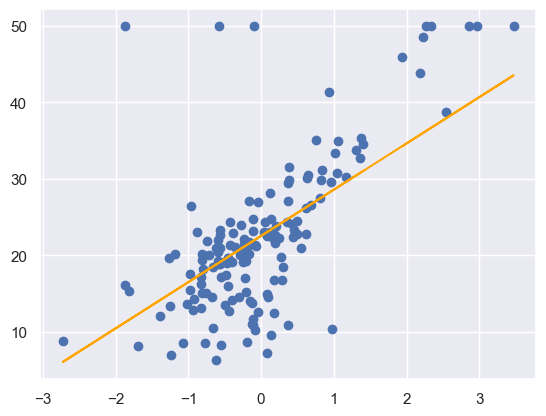

In [35]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

In [36]:
r2: float = sk_r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.457647)

0.45764736329252065


In [37]:
mse: float = sk_mse(df_target_test, pred)
print(mse)
assert np.isclose(mse, 54.93216)

54.93216051758424
